In [1]:
from IPython import get_ipython
ip = get_ipython()
if ip is not None:
    ip.run_line_magic('load_ext', 'pymor.discretizers.builtin.gui.jupyter')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='torch')
import pymor.tools.random
pymor.tools.random._default_random_state = None

The pymor.discretizers.builtin.gui.jupyter extension is already loaded. To reload it, use:
  %reload_ext pymor.discretizers.builtin.gui.jupyter


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sps
from pymor.models.iosys import LTIModel

plt.rcParams['axes.grid'] = True

In [3]:
k = 50
n = 2 * k + 1
l = 50

E = sps.eye(n, format='lil')
E[0, 0] = E[-1, -1] = 0.5
E = E.tocsc()

d0 = n * [-2 * (n - 1)**2 + l]
d1 = (n - 1) * [(n - 1)**2]
A = sps.diags([d1, d0, d1], [-1, 0, 1], format='lil')
A[0, 0] = A[-1, -1] = -n * (n - 1) + l / 2
A = A.tocsc()

B = np.zeros((n, 1))
B[0, 0] = n - 1

C = np.zeros((1, n))
C[0, -1] = 1

In [4]:
fom = LTIModel.from_matrices(A, B, C, E=E)

In [5]:
ast_spectrum = fom.get_ast_spectrum()
print(ast_spectrum[1])

[48.29293004+0.j 36.50842397+0.j  6.65573911+0.j]


In [6]:
ast_spectrum = fom.get_ast_spectrum(ast_pole_data={'k': 10, 'sigma': 0})
print(ast_spectrum[1])

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

[ 6.65573911+0.j 36.50842397+0.j 48.29293004+0.j]


In [7]:
from pymor.reductors.bt import FDBTReductor
fdbt = FDBTReductor(fom, ast_pole_data={'k': 10, 'sigma': 0})

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

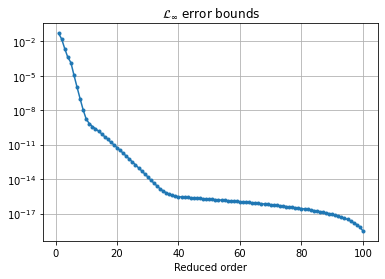

In [8]:
error_bounds = fdbt.error_bounds()
fig, ax = plt.subplots()
ax.semilogy(range(1, len(error_bounds) + 1), error_bounds, '.-')
ax.set_xlabel('Reduced order')
_ = ax.set_title(r'$\mathcal{L}_\infty$ error bounds')

In [9]:
rom = fdbt.reduce(10)

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

In [10]:
err = fom - rom
print(f'Relative Linf error:   {err.linf_norm() / fom.linf_norm():.3e}')

Relative Linf error:   2.973e-09


In [11]:
from pymor.reductors.h2 import GapIRKAReductor
gapirka = GapIRKAReductor(fom)
rom = gapirka.reduce(10)

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

In [12]:
err = fom - rom
print(f'Relative Linf error:   {err.linf_norm() / fom.linf_norm():.3e}')

Relative Linf error:   2.849e-09
